<hr id="import">

<h2>1. Data Collection</h2>

<h4>Importing libraries</h4> 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import plotly.express as px
import time
from sklearn.manifold import TSNE
import seaborn as sns
RANDOM_SEED = 42
LABELS = ["Normal", "air blockage", "air leakage"]

<h4>Importing Dataset</h4>

In [2]:
# load the data
df = pd.read_csv('Pronto data_project 3.csv')
df.head()

Hour of day  FT305/OUT.CV  FT302/OUT.CV  FT305/AI2/OUT.CV  PT312/OUT.CV  \
0            3     99.791138      0.002018         16.464531      1.157051   
1           21     99.843597      0.001718         16.465521      1.157019   
2           11     99.848373      0.001418         16.466499      1.156986   
3           12     99.824516      0.001118         16.467489      1.156954   
4           20     99.772057      4.008060         16.468470      1.156922   

   FT102/OUT.CV  FT104/OUT.CV  FT102/AI3/OUT.CV  FT102/AI2/OUT.CV  \
0      0.000150      0.008799          18.75639        998.257629   
1      0.000151      0.008799          18.75639        998.257812   
2      0.000152      0.008799          18.51083        998.257996   
3      0.000153      0.008799          18.51083        998.258179   
4      0.000154      0.008800          18.51083        998.258301   

   PT417/OUT.CV  ...  FIC302/PID1/PV.CV  FIC301/PID1/OUT.CV  \
0      1.131950  ...          99.691002                 0.0   
1      1.131800  ...          99.745041                 0.0   
2      1.131650  ...          99.799088                 0.0   
3      1.131646  ...          99.853127                 0.0   
4      1.131642  ...          99.797951                 0.0   

   FIC301/PID1/SP.CV  FIC301/PID1/PV.CV  FIC102/PID1/OUT.CV  \
0            100.001           0.002018                 0.0   
1            100.001           0.001718                 0.0   
2            100.001           0.001418                 0.0   
3            100.001           0.001118                 0.0   
4            100.001           4.008060                 0.0   

   FIC102/PID1/SP.CV  FIC102/PID1/PV.CV  FIC101/PID1/OUT.CV  \
0                0.0           0.000150                 0.0   
1                0.0           0.000151                 0.0   
2                0.0           0.000152                 0.0   
3                0.0           0.000153                 0.0   
4                0.0           0.000154                 0.0   

   FIC101/PID1/SP.CV  FIC101/PID1/PV.CV  
0                0.0           0.008799  
1                0.0           0.008799  
2                0.0           0.008799  
3                0.0           0.008799  
4                0.0           0.008800  

[5 rows x 32 columns]

<hr id="clean">

<h2>2. Data Cleaning and Preparation</h2>

<h3 id="clean-missing">Handle missing values</h3>

<h4>Identify missing values</h4>

In [3]:
# get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour of day            13942 non-null  int64  
 1   FT305/OUT.CV           13908 non-null  float64
 2   FT302/OUT.CV           13879 non-null  float64
 3   FT305/AI2/OUT.CV       13874 non-null  float64
 4   PT312/OUT.CV           13940 non-null  float64
 5   FT102/OUT.CV           13925 non-null  float64
 6   FT104/OUT.CV           13938 non-null  float64
 7   FT102/AI3/OUT.CV       13837 non-null  float64
 8   FT102/AI2/OUT.CV       13887 non-null  float64
 9   PT417/OUT.CV           13813 non-null  float64
 10  PT408/OUT.CV           13850 non-null  float64
 11  PT403/OUT.CV           13908 non-null  float64
 12  FT404/OUT.CV           13901 non-null  float64
 13  FT406/OUT.CV           13912 non-null  float64
 14  PT501/OUT.CV           13895 non-null  float64
 15  PI

In [4]:
# find the number of missing values in each column
df.isna().sum()

Hour of day                0
FT305/OUT.CV              34
FT302/OUT.CV              63
FT305/AI2/OUT.CV          68
PT312/OUT.CV               2
FT102/OUT.CV              17
FT104/OUT.CV               4
FT102/AI3/OUT.CV         105
FT102/AI2/OUT.CV          55
PT417/OUT.CV             129
PT408/OUT.CV              92
PT403/OUT.CV              34
FT404/OUT.CV              41
FT406/OUT.CV              30
PT501/OUT.CV              47
PIC501/PID1/OUT.CV       134
LI502/OUT.CV              47
LI503/OUT.CV             139
LVC502-SR/PID1/OUT.CV    107
LI101/OUT.CV              90
FIC302/PID1/OUT.CV        35
FIC302/PID1/SP.CV        128
FIC302/PID1/PV.CV         61
FIC301/PID1/OUT.CV        37
FIC301/PID1/SP.CV         62
FIC301/PID1/PV.CV         83
FIC102/PID1/OUT.CV       133
FIC102/PID1/SP.CV         62
FIC102/PID1/PV.CV        129
FIC101/PID1/OUT.CV       112
FIC101/PID1/SP.CV         60
FIC101/PID1/PV.CV        102
dtype: int64

<h4>Drop rows with "NaN" from certain columns</h4>

In [5]:
# replace the missing values in the input columns with the mean of the previous and next values
df.interpolate(method='linear', inplace=True)


<h4 id="clean-duplicates">Remove duplicates</h4>

<h4>Validate cleaned data</h4>

In [6]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hour of day            13942 non-null  int64  
 1   FT305/OUT.CV           13942 non-null  float64
 2   FT302/OUT.CV           13942 non-null  float64
 3   FT305/AI2/OUT.CV       13942 non-null  float64
 4   PT312/OUT.CV           13942 non-null  float64
 5   FT102/OUT.CV           13942 non-null  float64
 6   FT104/OUT.CV           13942 non-null  float64
 7   FT102/AI3/OUT.CV       13942 non-null  float64
 8   FT102/AI2/OUT.CV       13942 non-null  float64
 9   PT417/OUT.CV           13942 non-null  float64
 10  PT408/OUT.CV           13942 non-null  float64
 11  PT403/OUT.CV           13942 non-null  float64
 12  FT404/OUT.CV           13942 non-null  float64
 13  FT406/OUT.CV           13942 non-null  float64
 14  PT501/OUT.CV           13942 non-null  float64
 15  PI

In [7]:
# check for duplicates
df.duplicated().sum()

4

<h3>Principle Component Analysis (PCA)</h3>

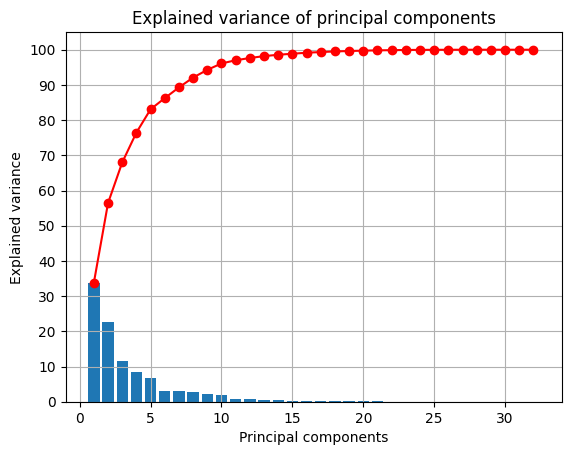

In [8]:
from sklearn.decomposition import PCA

# calculate principal components and plot explained variance
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

pipe.fit(df)

# explained variance %
explained_variance = pipe.named_steps['pca'].explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance)

# plot the explained variance % as bar chart
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', color='r')
plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.title('Explained variance of principal components')
plt.show()

<h3>perform dimensionality reduction and visualize PCs</h3>

In [16]:

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))
])

# Create a dataframe
X = pd.DataFrame(df)

# Transform the data
X_transformed = pipe.fit_transform(X)

# Create DataFrame with transformed data
df_PCA = pd.DataFrame(X_transformed, columns=['pc1', 'pc2', 'pc3'])
df_PCA['class'] = 0





KeyError: 'pc1'

In [10]:
df_PCA.head()

pc1       pc2       pc3  class
0 -3.000072  2.548582 -0.721591      0
1 -2.985707  2.552660 -0.710928      0
2 -3.000308  2.552654 -0.743301      0
3 -2.994914  2.556548 -0.742209      0
4 -2.977893  2.520711 -0.721933      0

<hr id="clean">
<h2>3.load faulty data, process</h2>

<h1>1</h1>

<h1>2</h1>

<h1>2--</h1>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 4 build and train a GMM for anomaly detection</h2>

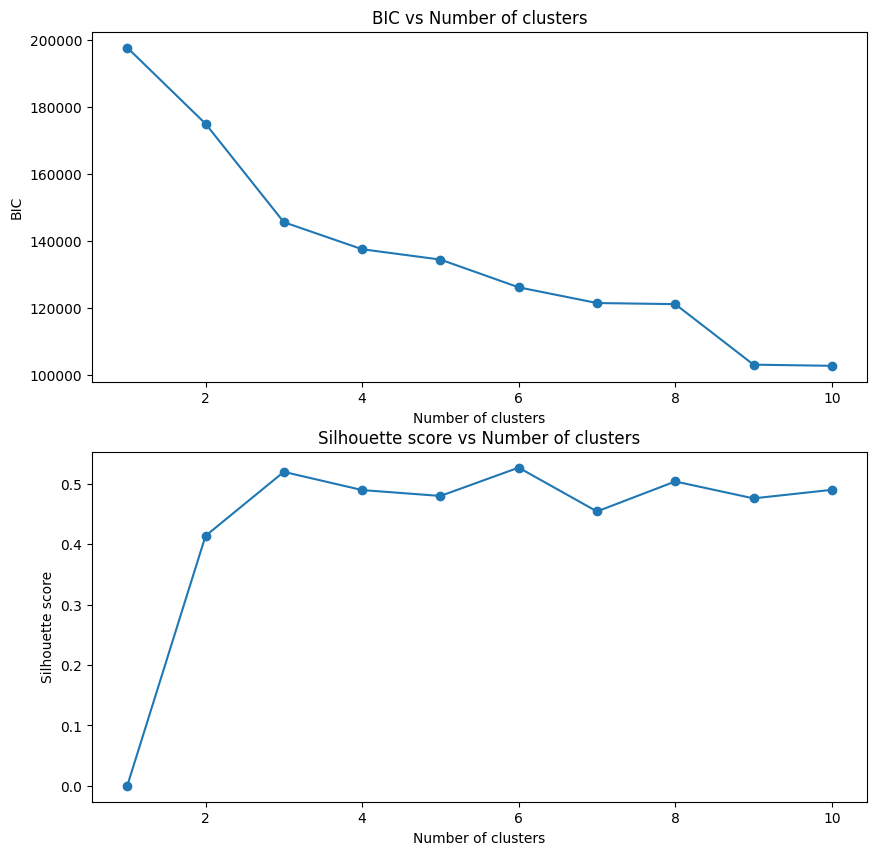

In [11]:
# TODO: determine the optimal number of clusters using the BIC elbow method for GMM
# train the model using only normal conditions data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

BICs = []
silhouettes = [0]
X = df_PCA.drop('class', axis=1)
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    BICs.append(gmm.bic(X))
    if i > 1:
        silhouettes.append(silhouette_score(X, gmm.predict(X)))

# plot the BICs
# subplot 1: BIC
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), BICs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC vs Number of clusters')

# subplot 2: silhouette score
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')

plt.show()


In [12]:
# TODO: build the GMM model with the optimum number of components
gmm = GaussianMixture(n_components=3, random_state=42)

# TODO: train the model using only the normal data
X = df_PCA
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 5. anomaly detection using the trained GMM</h2>


In [13]:
# TODO: 1. calculate the anomaly scores for the combined data
df_PCA['score'] = gmm.score_samples(df_PCA[['pc1', 'pc2', 'pc3', 'pc4', 'pc5']])

# TODO: visualize the scores using a histogram
plt.hist(df_PCA['score'], bins=10)
plt.axvline(np.percentile(df_PCA['score'], 10), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

KeyError: "['pc4', 'pc5'] not in index"

<h1>3</h1>

<h1>4</h1>

<h1>5</h1>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">
<h1>Building GMM for anomaly detection</h1>

In [14]:
# Fit Gaussian Mixture Model to the anomalies
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming your data is stored in the variable X
# X should be a numpy array or pandas DataFrame

# Fit the GMM model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(df_PCA)

# Get the predicted labels for each data point
labels = gmm.predict(df_PCA)

# Find the cluster with the highest probability for each data point
probs = gmm.predict_proba(df_PCA)
max_probs = np.max(probs, axis=1)

# Define a threshold for classifying anomalies
threshold = 0.99 # Adjust this threshold as needed

# Separate the data into normal and anomaly clusters
normal_data = X[max_probs >= threshold]
anomaly_data = X[max_probs < threshold]



gmm = GaussianMixture(n_components=2, random_state=RANDOM_SEED)
gmm.fit(anomaly_data)

# Predict the cluster labels for the anomalies
anomaly_labels = gmm.predict(anomaly_data)

# Add the cluster labels to the anomaly_data DataFrame
anomaly_data['Cluster'] = anomaly_labels

# Separate the anomalies into two clusters
cluster_0 = anomaly_data[anomaly_data['Cluster'] == 0]
cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]
# Number of normal data
num_normal_data = len(X_transformed)
print("Number of normal data:", num_normal_data)

# Number of anomaly data in cluster 1
num_anomaly_cluster_1 = len(anomaly_data[anomaly_data['Cluster'] == 0])
print("Number of anomaly data in cluster 1:", num_anomaly_cluster_1)

# Number of anomaly data in cluster 2
num_anomaly_cluster_2 = len(anomaly_data[anomaly_data['Cluster'] == 1])
print("Number of anomaly data in cluster 2:", num_anomaly_cluster_2)

# Create a new column 'Cluster' in df_PCA
df_PCA['Cluster'] = 2  # Set all values to 2 initially

# Update cluster labels for anomalies
anomaly_indices = anomaly_data.index
df_PCA.loc[anomaly_indices, 'Cluster'] = anomaly_labels

# Print the updated DataFrame
print(df_PCA)

anomaly_data.to_csv('anomaly_data.csv', index=False)










Number of normal data: 13942
Number of anomaly data in cluster 1: 951
Number of anomaly data in cluster 2: 54
            pc1       pc2       pc3  class  Cluster
0     -3.000072  2.548582 -0.721591      0        0
1     -2.985707  2.552660 -0.710928      0        0
2     -3.000308  2.552654 -0.743301      0        0
3     -2.994914  2.556548 -0.742209      0        0
4     -2.977893  2.520711 -0.721933      0        0
...         ...       ...       ...    ...      ...
13937 -2.198710 -5.171426  0.002063      0        2
13938  4.559815  0.377616 -1.697474      0        2
13939  1.397748  2.804139  1.037645      0        2
13940 -2.856546  0.039680 -1.981884      0        2
13941  2.679535 -5.596933  0.083413      0        2

[13942 rows x 5 columns]


C:\Users\Nagdy\AppData\Local\Temp\ipykernel_28140\3781000906.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_data['Cluster'] = anomaly_labels


In [15]:
import matplotlib.pyplot as plt
import plotly.express as px

# Create a DataFrame for normal data
normal_data = X[X['Cluster'] == 2]

# Create a DataFrame for anomalies in cluster 1
anomaly_cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]

# Create a DataFrame for anomalies in cluster 0
anomaly_cluster_0 = anomaly_data[anomaly_data['Cluster'] == 0]

# Create a 3D scatter plot
fig = px.scatter_3d(normal_data, x='pc1', y='pc2', z='pc3', color='Cluster', symbol='Cluster')
fig.add_trace(px.scatter_3d(anomaly_cluster_1, x='pc1', y='pc2', z='pc3', color='Cluster', symbol='Cluster').data[0])
fig.add_trace(px.scatter_3d(anomaly_cluster_0, x='pc1', y='pc2', z='pc3', color='Cluster', symbol='Cluster').data[0])

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create a trace for normal data
x = X_transformed[:, 0]
normal_trace = go.Scatter3d(
    x=x,
    y=X_transformed[:, 1],
    z=X_transformed[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color='blue',
        opacity=0.8
    ),
    name='Normal Data'
)

# Create a trace for cluster 1 anomalies
cluster_1_trace = go.Scatter3d(
    x=cluster_1['pc1'],
    y=cluster_1['pc2'],
    z=cluster_1['pc3'],
    mode='markers',
    marker=dict(
        size=3,
        color='green',
        opacity=0.8
    ),
    name='Cluster 1 Anomalies'
)

# Create the layout
fig = go.Figure(data=[normal_trace, cluster_1_trace], layout=layout)
fig.show()


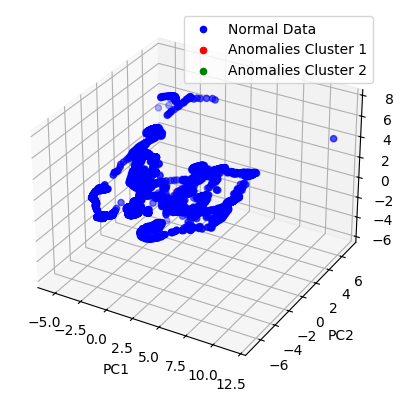

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot normal data
normal_data = X[X['Cluster'] == 2]
ax.scatter(normal_data['pc1'], normal_data['pc2'], normal_data['pc3'], c='blue', label='Normal Data')

# Plot anomalies in cluster 1
anomalies_cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]
ax.scatter(anomalies_cluster_1['pc1'], anomalies_cluster_1['pc2'], anomalies_cluster_1['pc3'], c='red', label='Anomalies Cluster 1')

# Plot anomalies in cluster 2
anomalies_cluster_2 = anomaly_data[anomaly_data['Cluster'] == 0]
ax.scatter(anomalies_cluster_2['pc1'], anomalies_cluster_2['pc2'], anomalies_cluster_2['pc3'], c='green', label='Anomalies Cluster 2')

# Set labels and legend
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

# Show the plot
plt.show()


In [ ]:
# Load the anomaly_data.CSV file into a DataFrame
anomaly_data = pd.read_csv('anomaly_data.CSV')

# Filter the DataFrame for cluster 0 and 1
cluster_0 = anomaly_data[anomaly_data['Cluster'] == 0]
cluster_1 = anomaly_data[anomaly_data['Cluster'] == 1]

# Calculate the mean and variance for cluster 0
cluster_0_mean = cluster_0.mean()
cluster_0_variance = cluster_0.var()

# Calculate the mean and variance for cluster 1
cluster_1_mean = cluster_1.mean()
cluster_1_variance = cluster_1.var()

# Print the results
print("Cluster 0 Mean:")
print(cluster_0_mean)
print("\nCluster 0 Variance:")
print(cluster_0_variance)




Cluster 0 Mean:
pc1        0.425112
pc2        0.270617
pc3       -1.850239
pc4       -0.913698
pc5        0.422573
pc6        0.140928
pc7       -0.226163
pc8        1.250380
pc9       -0.661791
pc10      -0.299590
Cluster    0.000000
dtype: float64

Cluster 0 Variance:
pc1        0.317140
pc2        0.046332
pc3        0.208814
pc4        0.129484
pc5        0.280961
pc6        0.567035
pc7        0.264434
pc8        0.200158
pc9        0.081527
pc10       0.026759
Cluster    0.000000
dtype: float64

Cluster 1 Mean:
pc1       -3.240309
pc2       -0.954244
pc3        0.982768
pc4       -0.733477
pc5        1.498727
pc6       -0.039947
pc7        0.217667
pc8       -0.920189
pc9       -0.466026
pc10       0.876838
Cluster    1.000000
dtype: float64

Cluster 1 Variance:
pc1        0.318810
pc2        6.185488
pc3        1.381753
pc4        0.397567
pc5        0.796156
pc6        0.608170
pc7        0.269623
pc8        0.094146
pc9        0.503511
pc10       0.422770
Cluster    0.000000


In [ ]:
print("\nCluster 1 Mean:")
print(cluster_1_mean)
print("\nCluster 1 Variance:")
print(cluster_1_variance)


Cluster 1 Mean:
pc1       -3.240309
pc2       -0.954244
pc3        0.982768
pc4       -0.733477
pc5        1.498727
pc6       -0.039947
pc7        0.217667
pc8       -0.920189
pc9       -0.466026
pc10       0.876838
Cluster    1.000000
dtype: float64

Cluster 1 Variance:
pc1        0.318810
pc2        6.185488
pc3        1.381753
pc4        0.397567
pc5        0.796156
pc6        0.608170
pc7        0.269623
pc8        0.094146
pc9        0.503511
pc10       0.422770
Cluster    0.000000
dtype: float64


In [ ]:
df_block = pd.read_csv('Class2..air blockage.csv')
df_leak  = pd.read_csv('Classs 1..air leakage.csv')

# drop class column 
df_block = df_block.drop(['class'], axis=1)
block_dataframe = pd.DataFrame(df_block)
df_leak = df_leak.drop(['class'], axis=1)
leak_dataframe = pd.DataFrame(df_leak)

# Define a new pipeline without the 'Hour of day' feature
new_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

# Drop the 'Hour of day' feature from the original DataFrame before fitting the new pipeline
df_no_hour_of_day = df.drop('Hour of day', axis=1)

# Fit the new pipeline on the modified DataFrame
new_pipe.fit(df_no_hour_of_day)

# Transform test data using the new pipeline
data_pca_block = new_pipe.transform(df_block)
data_pca_leak = new_pipe.transform(df_leak)

# Create DataFrame with transformed data
df_pca_block = pd.DataFrame(data_pca_block, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
df_pca_block['class'] = 1

df_pca_leak = pd.DataFrame(data_pca_leak, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
df_pca_leak['class'] = 2





In [ ]:
blockage_mean = df_pca_block.mean()
blockage_variance = df_pca_block.var()
# Print the results
print("blockage_mean:")
print(blockage_mean)
print("\nblockage_variance:")
print(blockage_variance)

blockage_mean:
pc1      1.401730
pc2      3.445386
pc3      7.262500
pc4      3.403758
pc5      2.345036
pc6      0.294275
pc7      0.216896
pc8     -0.740793
pc9      0.133090
pc10     4.919083
class    1.000000
dtype: float64

blockage_variance:
pc1      0.157287
pc2      0.264898
pc3      0.057671
pc4      0.486145
pc5      0.044659
pc6      0.000226
pc7      0.455824
pc8      0.013654
pc9      0.109320
pc10     0.061951
class    0.000000
dtype: float64


In [ ]:
leakage_mean = df_pca_leak.mean()
leakage_var = df_pca_leak.var()
# Print the results
print("leakage_mean:")
print(leakage_mean)
print("\nleakage_variance:")
print(leakage_var)

leakage_mean:
pc1     -4.070428
pc2      4.930792
pc3      5.124804
pc4     -0.898717
pc5     -3.190644
pc6      0.069606
pc7      0.164100
pc8      0.132310
pc9     -0.659600
pc10    -1.140565
class    2.000000
dtype: float64

leakage_variance:
pc1      0.003829
pc2      0.017736
pc3      0.005835
pc4      0.101117
pc5      0.053872
pc6      0.000001
pc7      0.001369
pc8      0.021037
pc9      0.005587
pc10     0.000056
class    0.000000
dtype: float64


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 6 build and train a Isolate Forest  for anomaly detection</h2>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest 
# 

<h4>Building and isolation forest model (10 features)</h4>

In [ ]:
anomaly_inputs=["pc1","pc2",'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10']
model_IF=IsolationForest(contamination=0.1 , random_state=42 )
model_IF.fit(df_PCA[anomaly_inputs])
df_PCA['anomaly_score']=model_IF.decision_function(df_PCA[anomaly_inputs])
df_PCA['anomaly']=model_IF.predict(df_PCA[anomaly_inputs])
df_PCA.loc[:, ["pc1","pc2",'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10','anomaly_score','anomaly']]

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -3.000072  2.548582 -0.721591  3.083297 -3.215915  0.816730 -0.859494   
1     -2.985707  2.552660 -0.710928  3.058861 -3.220095 -1.424763  0.669638   
2     -3.000308  2.552654 -0.743301  3.073684 -3.258693 -0.182957 -0.178370   
3     -2.994914  2.556548 -0.742209  3.054026 -3.270054 -0.307178 -0.093163   
4     -2.977893  2.520711 -0.721933  3.040992 -3.285801 -1.303414  0.587299   
...         ...       ...       ...       ...       ...       ...       ...   
13937 -2.198710 -5.171426  0.002063  0.452960 -2.029779  0.878144 -0.502760   
13938  4.559815  0.377616 -1.697474 -1.139130  1.265451  0.864924 -0.503271   
13939  1.397748  2.804139  1.037645  0.480025 -2.122795 -0.102493 -0.097324   
13940 -2.856546  0.039680 -1.981884  0.503950  0.127206  0.744723 -0.460423   
13941  2.679535 -5.596933  0.083413  0.091324 -1.510810  0.335093 -0.276519   

            pc8       pc9      pc10  anomaly_score  anomaly  
0     -0.406295 -0.530093  0.814201      -0.021687       -1  
1     -0.172785 -0.574822  0.837010      -0.028854       -1  
2     -0.334878 -0.503667  0.822058       0.018627        1  
3     -0.322318 -0.509448  0.826021       0.026170        1  
4     -0.221996 -0.523341  0.835803      -0.013579       -1  
...         ...       ...       ...            ...      ...  
13937 -0.153929  1.552882 -0.830715       0.001504        1  
13938 -0.698471  1.054455 -0.485846       0.043709        1  
13939  1.308277 -0.522948 -0.007415       0.054101        1  
13940 -0.101705  1.081423 -0.631663       0.074451        1  
13941 -0.367461  0.255959  0.227027       0.043517        1  

[13942 rows x 12 columns]

In [ ]:
#plot the anomalies
palette=['#ff0e0e','#1f77b4','#03fc28']
sns.pairplot(df_PCA, vars=anomaly_inputs, hue='anomaly', palette=palette)

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: U

Error in callback <function flush_figures at 0x000001D4C24EF100> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# Your existing code
anomaly_inputs = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"]
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df_PCA[anomaly_inputs])
df_PCA['anomaly_score'] = model_IF.decision_function(df_PCA[anomaly_inputs])
df_PCA['anomaly'] = model_IF.predict(df_PCA[anomaly_inputs])

# New code to create three groups
# Define two thresholds for the anomaly scores
threshold_1 = np.percentile(df_PCA['anomaly_score'], 1)
threshold_2 = np.percentile(df_PCA['anomaly_score'], 5)

# Create a new column 'group' to assign each instance to a group
df_PCA['group'] = np.where(df_PCA['anomaly_score'] <= threshold_1, 'Group 1',
                           np.where(df_PCA['anomaly_score'] <= threshold_2, 'Group 2', 'Group 3'))

# Now you can view the dataframe with the new 'group' column
df_PCA.loc[:, anomaly_inputs + ['anomaly_score', 'anomaly', 'group']]

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -3.000072  2.548582 -0.721591  3.083297 -3.215915  0.816730 -0.859494   
1     -2.985707  2.552660 -0.710928  3.058861 -3.220095 -1.424763  0.669638   
2     -3.000308  2.552654 -0.743301  3.073684 -3.258693 -0.182957 -0.178370   
3     -2.994914  2.556548 -0.742209  3.054026 -3.270054 -0.307178 -0.093163   
4     -2.977893  2.520711 -0.721933  3.040992 -3.285801 -1.303414  0.587299   
...         ...       ...       ...       ...       ...       ...       ...   
13937 -2.198710 -5.171426  0.002063  0.452960 -2.029779  0.878144 -0.502760   
13938  4.559815  0.377616 -1.697474 -1.139130  1.265451  0.864924 -0.503271   
13939  1.397748  2.804139  1.037645  0.480025 -2.122795 -0.102493 -0.097324   
13940 -2.856546  0.039680 -1.981884  0.503950  0.127206  0.744723 -0.460423   
13941  2.679535 -5.596933  0.083413  0.091324 -1.510810  0.335093 -0.276519   

            pc8       pc9      pc10  anomaly_score  anomaly    group  
0     -0.406295 -0.530093  0.814201      -0.021687       -1  Group 2  
1     -0.172785 -0.574822  0.837010      -0.028854       -1  Group 2  
2     -0.334878 -0.503667  0.822058       0.018627        1  Group 3  
3     -0.322318 -0.509448  0.826021       0.026170        1  Group 3  
4     -0.221996 -0.523341  0.835803      -0.013579       -1  Group 3  
...         ...       ...       ...            ...      ...      ...  
13937 -0.153929  1.552882 -0.830715       0.001504        1  Group 3  
13938 -0.698471  1.054455 -0.485846       0.043709        1  Group 3  
13939  1.308277 -0.522948 -0.007415       0.054101        1  Group 3  
13940 -0.101705  1.081423 -0.631663       0.074451        1  Group 3  
13941 -0.367461  0.255959  0.227027       0.043517        1  Group 3  

[13942 rows x 13 columns]

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: U

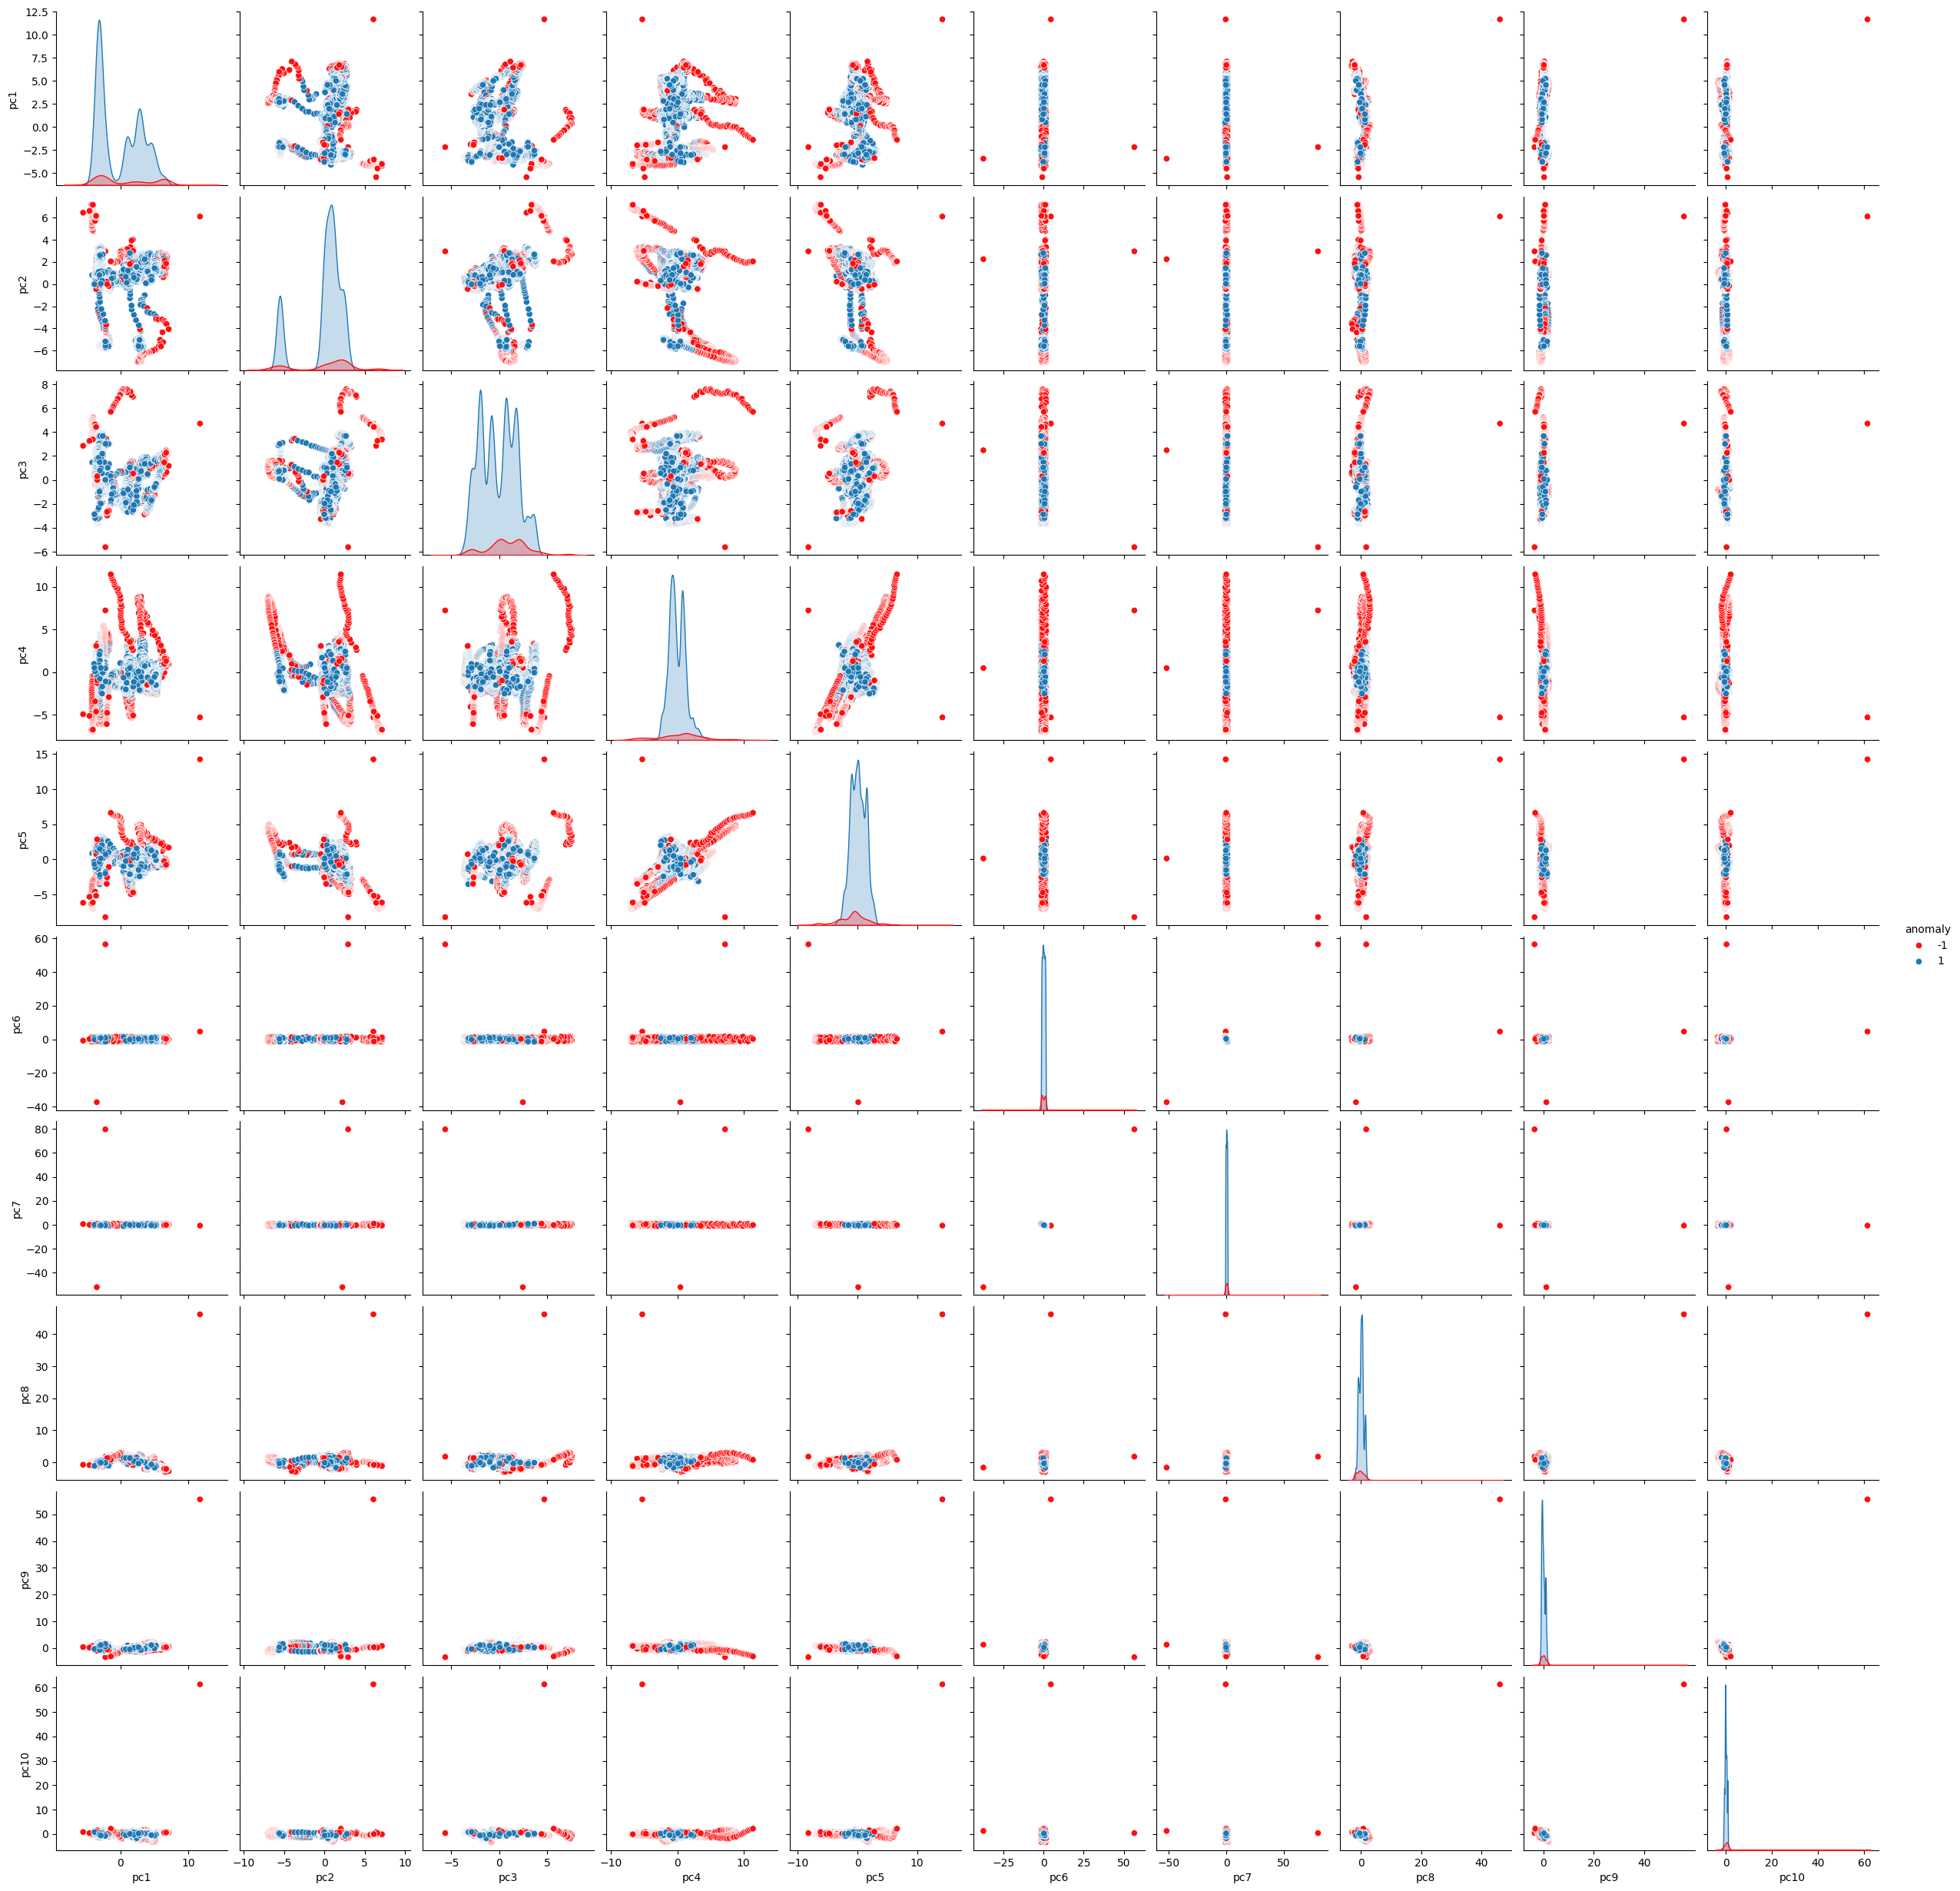

In [ ]:
#plot the anomalies
palette=['#ff0e0e','#1f77b4','#03fc28']
sns.pairplot(df_PCA, vars=anomaly_inputs, hue='anomaly', palette=palette)

<h1>6</h1>

<h1>7</h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming df_PCA is your DataFrame and 'group' is the column with group labels
plt.figure(figsize=(12, 6))
parallel_coordinates(df_PCA, 'group', cols=anomaly_inputs, color=['#ff0e0e','#1f77b4','#03fc28'])
plt.title('Parallel Coordinates Plot of PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Component Values')
plt.legend(title='Group')
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.manifold import TSNE

# Fit T-SNE to the PCA components
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(df_PCA[anomaly_inputs])

# Create a DataFrame for the results
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2', 'TSNE3'])
df_tsne['group'] = df_PCA['group']

color = ['#ff0e0e', '#1f77b4', '#03fc28']
fig = px.scatter_3d(df_tsne, x='TSNE1', y='TSNE2', z='TSNE3', color='group', color_discrete_sequence=color)
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=1000)
fig.show()

<h1>8</h1>

In [ ]:
# Plot the results

plt.figure(figsize=(10, 6))
sns.3Dscatter(x='TSNE1', y='TSNE2',z='TSNE3' , hue='group', data=df_tsne, palette=palette)
plt.title('T-SNE Plot of PCA Components')
plt.show()

<h1>9</h1>

<h1>10</h1>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 7 build and train a Kmeans  for anomaly detection</h2>

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans_model.fit(df_PCA[anomaly_inputs])

# Assign the clusters to each data point
df_PCA['cluster'] = kmeans_model.labels_

# Display the data points with their assigned cluster
df_PCA.loc[:, ["pc1", "pc2", 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'cluster']]


c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     -3.000332  2.548337 -0.722845  3.080975 -3.216727  0.817172 -0.859497   
1     -2.985982  2.552405 -0.712551  3.056955 -3.221367 -1.424255  0.669109   
2     -3.000576  2.552403 -0.744724  3.071525 -3.259703 -0.182504 -0.178579   
3     -2.995184  2.556296 -0.743652  3.051887 -3.271082 -0.306723 -0.093401   
4     -2.978169  2.520458 -0.723541  3.039033 -3.287033 -1.302933  0.586831   
...         ...       ...       ...       ...       ...       ...       ...   
13933 -2.198564 -5.170907  0.001754  0.451670 -2.029376  0.878529 -0.502771   
13934  4.559566  0.377968 -1.697221 -1.138975  1.266495  0.864260 -0.502338   
13935  1.397336  2.804180  1.036695  0.478909 -2.122948 -0.101082 -0.098846   
13936 -2.856513  0.039578 -1.982162  0.503395  0.127628  0.745046 -0.460436   
13937  2.679520 -5.596034  0.083261  0.090550 -1.510628  0.334983 -0.276231   

            pc8       pc9      pc10  cluster  
0     -0.408535 -0.530322  0.814645        2  
1     -0.171491 -0.575037  0.837087        2  
2     -0.335553 -0.503883  0.822344        2  
3     -0.322796 -0.509663  0.826285        2  
4     -0.220904 -0.523550  0.835907        2  
...         ...       ...       ...      ...  
13933 -0.155747  1.553045 -0.830190        1  
13934 -0.699644  1.054270 -0.485230        0  
13935  1.308196 -0.522792 -0.007734        0  
13936 -0.103044  1.081471 -0.631382        2  
13937 -0.368145  0.256097  0.226955        1  

[13938 rows x 11 columns]

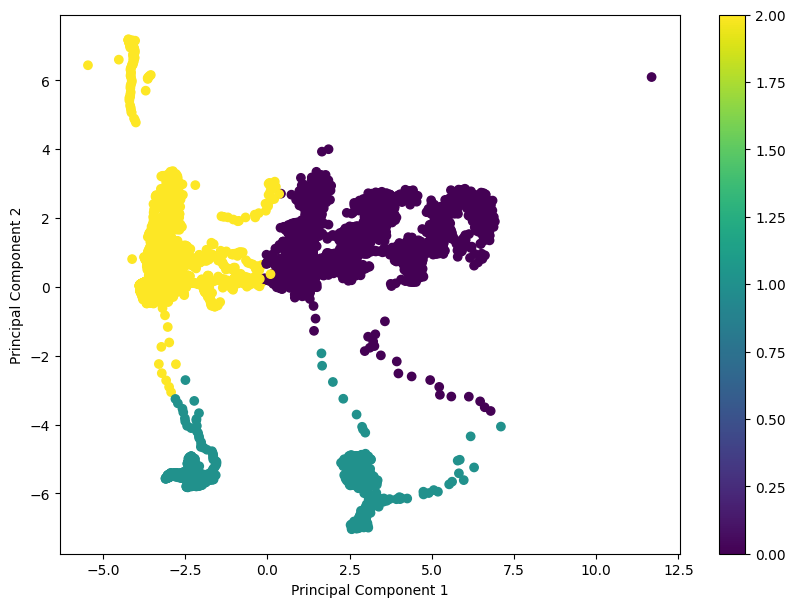

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_PCA[anomaly_inputs])

# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_PCA['cluster'], cmap='viridis', marker='o')

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a color bar to show the cluster colors
plt.colorbar()

# Show the plot
plt.show()


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

<h2> 8 build and train a SVC  for anomaly detection</h2>